# **NETFLIX DATASET**

**In this project ,I am going to analyze Netflix dataset using pandas dataframe to generate some insights . I have CSV file of Netflix data sets.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the Data and storing into a variable using pandas

In [2]:
df=pd.read_csv("raw_titles.csv")

In [3]:
df=df.dropna(how="all")

In [4]:
df.head(5)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [5]:
df.isnull().sum()

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

Number of Movies and Shows available in netflix 

In [6]:
df["type"].value_counts()

type
MOVIE    3759
SHOW     2047
Name: count, dtype: int64

There are 3759 Movies and 2047 Shows in Netflix

### Deleting the Rows which doesn't have any title name

In [7]:
df=df[~df["title"].isnull()]

### Total contents released from last 5 year

In [8]:
df.groupby("release_year")["title"].count().tail(5)

release_year
2018    774
2019    848
2020    805
2021    758
2022    217
Name: title, dtype: int64

### Breakdown of Movie and Shows Year Wise

In [9]:
df.groupby(["release_year","type"])["title"].nunique().unstack(fill_value=0).assign(Total=lambda x: x.sum(axis=1),Shows_percentage=lambda x: (x['SHOW'] / x['Total'] * 100).round(2)).tail(10)

type,MOVIE,SHOW,Total,Shows_percentage
release_year,,,,
2013,105,37,142,26.06
2014,114,46,160,28.75
2015,142,93,235,39.57
2016,229,142,371,38.27
2017,397,183,580,31.55
2018,473,301,774,38.89
2019,540,308,848,36.32
2020,499,306,805,38.01
2021,455,303,758,39.97


**As per the above table there is an upward trend of number of shows from the last 10 years, Number of movies has also seen an surge up untill 2019, afterwards we are seeing about a 10% drop for 2 consecutive years. Percentage of shows has also increased, in that 2021 & 2015 being the highest of about 40%**

## AN INSIGHT ABOUT THE CONTENT WHICH HAS NO RATINGS TILL NOW

In [10]:
a =df[df["imdb_score"].isnull()!=df["imdb_id"].isnull()]


In [11]:
a[a["type"]=="MOVIE"].count()


index                   43
id                      43
title                   43
type                    43
release_year            43
age_certification        9
runtime                 43
genres                  43
production_countries    43
seasons                  0
imdb_id                 43
imdb_score               0
imdb_votes               0
dtype: int64

THERE ARE ABOUT 78 TITLE'S WHICH HASNT BEEN RATED IN IMDB TILL NOW, MAYBE DUE TO LOW POPULARITY OUT OF WHICH 43 ARE MOVIES AND 35 ARE SHOWS

## BREAKING DOWN DATA INTO TWO PARTS BASED ON THE CONTENT TYPE

In [12]:
df_movies= df[df["type"]=="MOVIE"]
df_shows= df[df["type"]=="SHOW"]

In [13]:
df_movies.drop(["seasons"],axis=1,inplace=True)

C:\Users\ncras\AppData\Local\Temp\ipykernel_21536\1446743687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.drop(["seasons"],axis=1,inplace=True)


SEASON COLUMN IS NULL AND IRRELAVENT FOR THE MOVIE SECTION SO WE ARE DROPPING IT

## CONTENT PRODUCED BASED ON CERTIFICATIONS

In [14]:
movie_certification= df_movies.groupby("age_certification").agg(titles=("title","count")).sort_values("titles",ascending=False).reset_index()
movie_certification["percentage"] = round((movie_certification["titles"] / movie_certification["titles"].sum())*100,2)
movie_certification

,age_certification,titles,percentage
0,R,575,40.90
1,PG-13,440,31.29
2,PG,246,17.50
3,G,131,9.32
4,NC-17,14,1.00


"R" BEING THE MOST CERTIFIED FOLLOWED BY "PG-13", THE BOTH COMBINED CONTRIBUTES NEARLY 70% OF MOVIES. THE ADULT CONTENT IS BEING PRODUCED MORE WHILE CHILD CONTENT CONTRIBBUTES ABOUT 10%

In [15]:
show_certification= df_shows.groupby("age_certification").agg(titles=("title","count")).sort_values("titles",ascending=False).reset_index()
show_certification["percentage"] = round((show_certification["titles"] / show_certification["titles"].sum())*100,2)
show_certification

,age_certification,titles,percentage
0,TV-MA,841,46.98
1,TV-14,470,26.26
2,TV-PG,186,10.39
3,TV-Y7,112,6.26
4,TV-Y,105,5.87
5,TV-G,76,4.25


"TV-MA" BEING THE MOST CERTIFIED FOLLOWED BY "TV-14", THEY BOTH COMBINED CONTRIBUTES NEARLY 70% OF SHOWS. THE ADULT CONTENT IS BEING PRODUCED MORE IN SHOWS TOO. 

## MEAN RATINGS YEAR WISE FOR MOVIES AND SHOWS

In [16]:
MRplot =df_movies[df_movies["release_year"]>=2008].groupby("release_year").agg(mean_score=("imdb_score","mean")).round(2).reset_index().head(15)


In [17]:
SRplot =df_shows[df_shows["release_year"]>=2008].groupby("release_year").agg(mean_score=("imdb_score","mean")).round(2).reset_index().head(15)


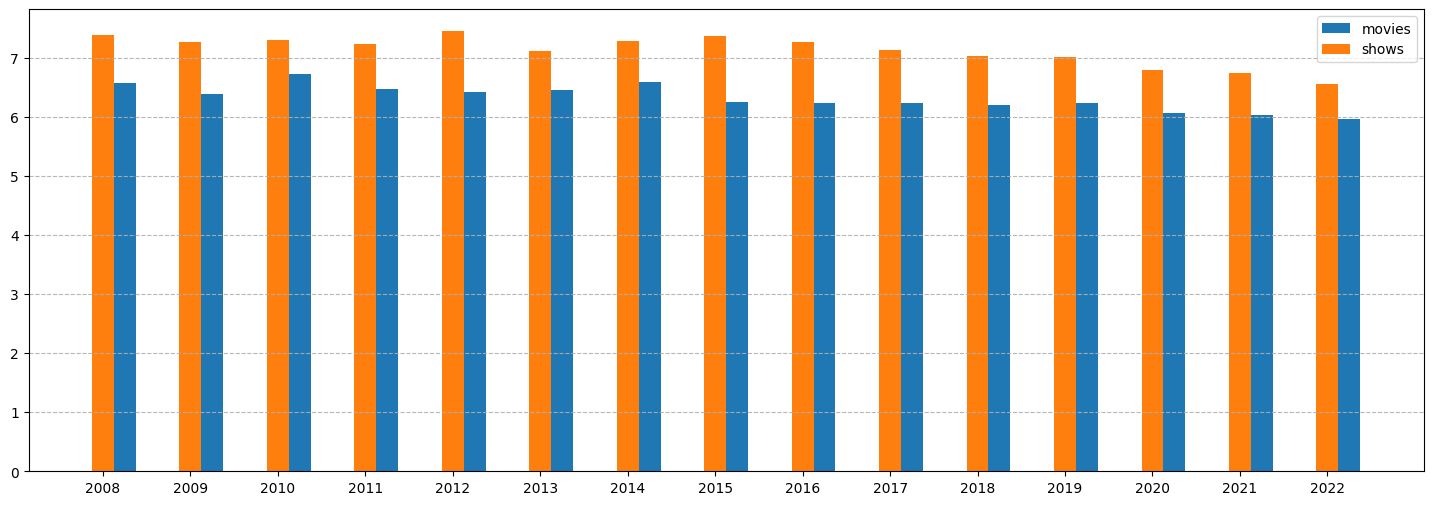

In [18]:
fig, ax1 = plt.subplots(figsize=(18,6))
width =0.25
x_indexes = np.arange(len(MRplot["release_year"]))

ax1.bar(x_indexes+width,MRplot["mean_score"],width=width)

ax1.bar(x_indexes,SRplot["mean_score"],width=width)
plt.xticks(ticks=x_indexes,labels=SRplot["release_year"])
ax1.grid(True, which="major", axis="y", linestyle="--", alpha=0.9)

plt.legend(["movies","shows"])

RATINGS FOR THE SHOWS ARE COMPARITIVELY HIGHER, BUT FOR BOTH MOVIES AND SHOWS THE RATINGS HAVE BEEN DROPPED OVER THE YEARS

### POPULARITY OF MOVIESAND SHOWS OVER THE YEARS BASED ON NUMBER OF VOTINGS FROM IMDB

In [19]:
MPplot =df_movies[df_movies["release_year"]>=2008].groupby("release_year").agg(median_votes=("imdb_votes","median")).reset_index().head(15)
MPplot["median_votes"]=MPplot["median_votes"].round(0)
MPplot

,release_year,median_votes
0,2008,4473.0
1,2009,7451.0
2,2010,10415.0
3,2011,8968.0
4,2012,2299.0
5,2013,5070.0
6,2014,2598.0
7,2015,3208.0
8,2016,2865.0
9,2017,2519.0


In [83]:
SPplot =df_shows[df_shows["release_year"]>=2008].groupby("release_year").agg(median_votes=("imdb_votes","median")).reset_index().head(15)
SPplot["median_votes"]=SPplot["median_votes"].round(0)
SPplot

,release_year,median_votes
0,2008,1856.0
1,2009,1951.0
2,2010,1291.0
3,2011,4367.0
4,2012,4519.0
5,2013,2200.0
6,2014,5975.0
7,2015,3174.0
8,2016,3454.0
9,2017,1873.0


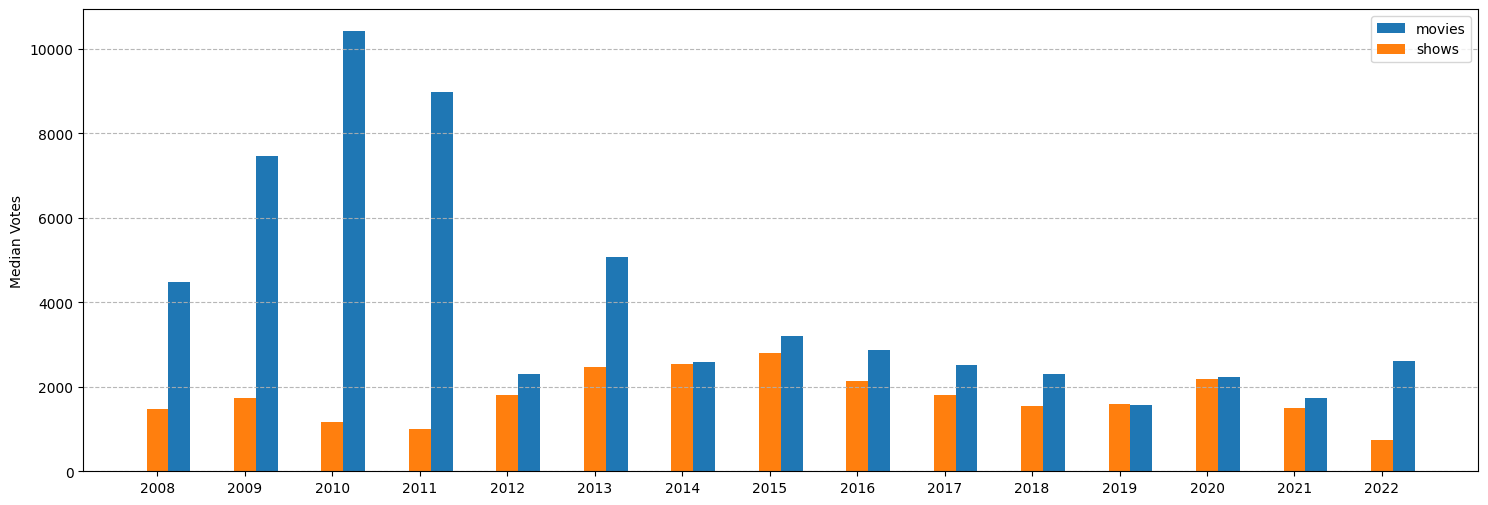

In [21]:
fig, ax1 = plt.subplots(figsize=(18,6))
width =0.25
x_indexes = np.arange(len(MPplot["release_year"]))

ax1.bar(x_indexes+width,MPplot["median_votes"],width=width)

ax1.bar(x_indexes,SPplot["median_votes"],width=width)
plt.xticks(ticks=x_indexes,labels=SPplot["release_year"])
plt.ylabel("Median Votes")
ax1.grid(True, which="major", axis="y", linestyle="--", alpha=0.9)
plt.legend(["movies","shows"])

MOVIES POPULARITY IN IMDB WERE QUITE HIGHER IN THE EARLY 2010'S BUT HAS BEEN DROPPED IN THE RECENT YEARS, SHOWS POPULARITY HAS BEEN INCREASED POST 2012 BUT COULDN'T BE ABLE TO INCREASE CONTINUOSLY

### DOES THE POPULARITY OF SHOWS DEPENDS ON HOW LONG DOES THE SHOW RAN OR BY THEIR RATINGS

In [22]:
seasons= df_shows.groupby("seasons").agg(Total_shows=("seasons","count"),ratings=("imdb_score","mean"),
                               votes=("imdb_votes","mean")).round(1).reset_index().head(10)

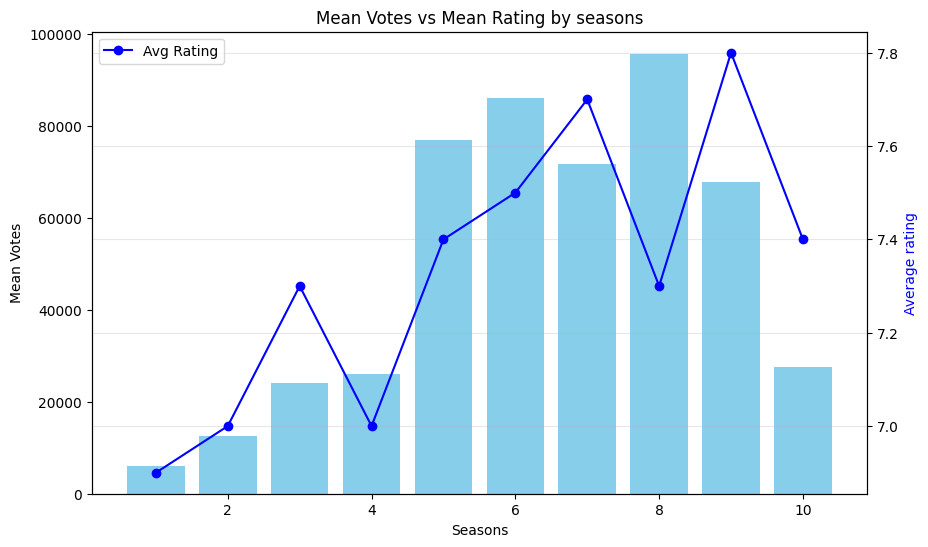

In [23]:
fig,ax1=plt.subplots(figsize=(10,6))
ax1.bar(seasons["seasons"],seasons["votes"],color="skyblue",label="Median Votes")
ax1.set_xlabel("Seasons")
ax1.set_ylabel("Mean Votes")

ax2 = ax1.twinx()
ax2.plot(seasons["seasons"],seasons["ratings"],color="Blue",marker="o",label="Avg Rating")
ax2.set_ylabel("Average rating",color="Blue")
plt.title("Mean Votes vs Mean Rating by seasons")
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()


AS THE NUMBER OF SEASONS INCREASED THE POPULARITY OF THE SHOWS WERE ALSO INCREASED, BUT RATINGS DOESN'T SHOW THE SIMILAR UPWARD TREND THROUGHOUT BUT IT SOMEHOW AGREES FOR 5,6,7 AND 9 SEASONS. 

### WHICH AGE-CERTIFIED SHOWS ARE LIKELY TO BE PRODUCED AND WHICH ARE LIST LIKELY TO BE PRODUCED

In [24]:
cert_plot_movies = df_movies.groupby("age_certification").agg(mean_rating=("imdb_score","mean"),mean_votes=("imdb_votes","mean")).round(1).reset_index()

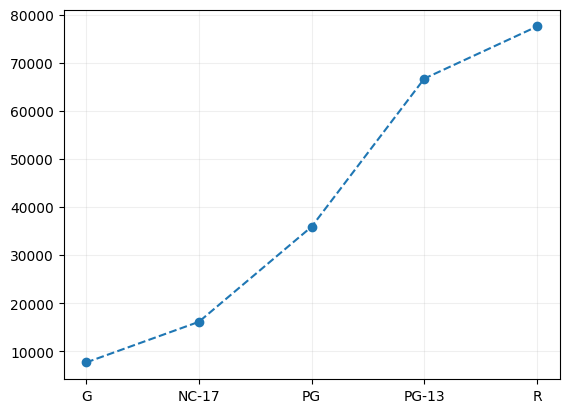

In [25]:
plt.plot(cert_plot_movies["age_certification"],cert_plot_movies["mean_votes"],marker="o",linestyle="--")
plt.grid(True,alpha=0.2)

WE CAN SEE A CORRELATION BETWEEN POPULARITY AND AGE CERTIFICATIONS. THE R RATED ARE MOST LIKELY TO BE PRODUCED AND G ARE LEAST LIKELY

### WHICH AGE-CERTIFIED SHOWS ARE LIKELY TO BE PRODUCED AND WHICH ARE LEAST LIKELY TO BE PRODUCED

In [26]:
cert_plot_shows = df_shows.groupby("age_certification").agg(mean_rating=("imdb_score","mean"),mean_votes=("imdb_votes","mean")).round(1).sort_values("mean_votes").reset_index()
cert_plot_shows

,age_certification,mean_rating,mean_votes
0,TV-Y,6.5,721.4
1,TV-G,6.3,4713.1
2,TV-Y7,6.9,7036.8
3,TV-PG,6.9,10189.4
4,TV-14,7.3,24005.5
5,TV-MA,7.1,24216.7


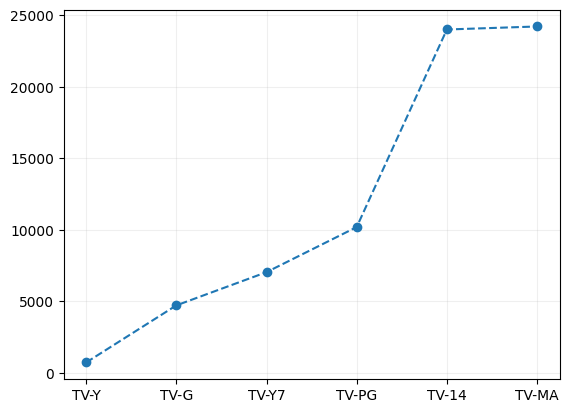

In [27]:
plt.plot(cert_plot_shows["age_certification"],cert_plot_shows["mean_votes"],marker="o",linestyle="--")
plt.grid(True,alpha=0.2)

WE CAN SEE A CORRELATION BETWEEN POPULARITY AND AGE CERTIFICATIONS AMONG SHOWS TOO. TV-MA AND TV-14 ARE MOST FREQUENTLY PRODUCED SHOWS AND TV-Y ARE LEAST PRODUCED

#### TOP 5 MOST RATED MOVIES

In [28]:
df_movies[df_movies["imdb_votes"]>10000].nlargest(5,"imdb_score")[["title","release_year","genres","production_countries","imdb_score","imdb_votes"]].sort_values(["imdb_score","imdb_votes"],ascending = [False,False]).reset_index(drop=True)

,title,release_year,genres,production_countries,imdb_score,imdb_votes
0,David Attenborough: A Life on Our Planet,2020,['documentation'],['GB'],9.0,31180.0
1,Inception,2010,"['scifi', 'music', 'thriller', 'action']","['GB', 'US']",8.8,2268288.0
2,Forrest Gump,1994,"['drama', 'romance', 'comedy']",['US'],8.8,1994599.0
3,Bo Burnham: Inside,2021,"['comedy', 'drama', 'music', 'reality']",['US'],8.7,44074.0
4,Anbe Sivam,2003,"['comedy', 'drama']",['IN'],8.7,20595.0


#### TOP 5 MOST POPULAR MOVIES 

In [29]:
df_movies.nlargest(5,"imdb_votes")[["title","release_year","genres","production_countries","imdb_score","imdb_votes"]].reset_index(drop=True)

,title,release_year,genres,production_countries,imdb_score,imdb_votes
0,Inception,2010,"['scifi', 'music', 'thriller', 'action']","['GB', 'US']",8.8,2268288.0
1,Forrest Gump,1994,"['drama', 'romance', 'comedy']",['US'],8.8,1994599.0
2,Django Unchained,2012,"['western', 'drama']",['US'],8.4,1472668.0
3,Saving Private Ryan,1998,"['drama', 'war']",['US'],8.6,1346020.0
4,Taxi Driver,1976,"['crime', 'drama']",['US'],8.3,795222.0


#### TOP 5 MOST RATED SHOWS

In [30]:
df_shows[df_shows["imdb_votes"]>10000].nlargest(5,"imdb_score")[["title","release_year","genres","production_countries","imdb_score","imdb_votes"]].sort_values(["imdb_score","imdb_votes"],ascending = [False,False]).reset_index(drop=True)

,title,release_year,genres,production_countries,imdb_score,imdb_votes
0,Breaking Bad,2008,"['drama', 'thriller', 'crime']",['US'],9.5,1727694.0
1,Avatar: The Last Airbender,2005,"['scifi', 'family', 'fantasy', 'animation', 'a...",['US'],9.3,297336.0
2,Kota Factory,2019,"['drama', 'comedy']",['IN'],9.3,66985.0
3,Our Planet,2019,['documentation'],['GB'],9.3,41386.0
4,The Last Dance,2020,"['documentation', 'history', 'sport']",['US'],9.1,108321.0


#### TOP 5 MOST POPULAR SHOWS

In [31]:
df_shows.nlargest(5,"imdb_votes")[["title","release_year","genres","production_countries","imdb_score","imdb_votes"]].reset_index(drop=True)

,title,release_year,genres,production_countries,imdb_score,imdb_votes
0,Breaking Bad,2008,"['drama', 'thriller', 'crime']",['US'],9.5,1727694.0
1,Stranger Things,2016,"['scifi', 'drama', 'fantasy', 'horror', 'thril...",['US'],8.7,989090.0
2,The Walking Dead,2010,"['action', 'drama', 'scifi', 'thriller', 'horr...",['US'],8.2,945125.0
3,Black Mirror,2011,"['scifi', 'thriller', 'drama', 'european']",['GB'],8.8,515577.0
4,House of Cards,2013,['drama'],['US'],8.7,494092.0


In [32]:
df_shows.replace(df_shows["runtime"]<5,np.nan,inplace=True)

In [33]:
df_movies.replace(df_movies["runtime"]<=10,np.nan,inplace=True)

### 3 LARGEST MOVIES BY RUNTIME

In [34]:
df_movies.nlargest(3,"runtime")

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
34,34,tm188894,The School of Mischief,MOVIE,1973,NaN,251,['comedy'],['EG'],NaN,NaN,NaN
1000,1000,tm469911,Bonnie & Clyde,MOVIE,2013,PG-13,240,"['drama', 'crime', 'european']",['AT'],tt2374851,NaN,NaN
25,25,tm76557,No Longer Kids,MOVIE,1979,NaN,235,"['comedy', 'drama']",['EG'],tt8312792,9.0,943.0


### 3 LARGEST SHOWS BY RUNTIME

In [35]:
df_shows.nlargest(3,"runtime")

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
657,657,ts19384,A Lion in the House,SHOW,2006,TV-14,225,['documentation'],['US'],1.0,NaN,NaN,NaN
3268,3268,ts90448,The Hateful Eight: Extended Version,SHOW,2019,TV-MA,199,"['western', 'crime', 'thriller', 'drama']",['US'],1.0,NaN,NaN,NaN
3828,3828,ts90995,1994,SHOW,2019,TV-MA,178,"['documentation', 'history']",['MX'],1.0,tt10243640,7.5,514.0


In [36]:
import ast
df_movies["genres"]=df_movies["genres"].apply(ast.literal_eval)
df_movies=df_movies.explode("genres").reset_index(drop=True)

C:\Users\ncras\AppData\Local\Temp\ipykernel_21536\1411966946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["genres"]=df_movies["genres"].apply(ast.literal_eval)


In [37]:
movies_genre = df_movies.groupby(["genres"]).agg(mean_rating=("imdb_score","mean"),mean_votes=("imdb_votes","mean"),avg_runtime=("runtime","mean"),total_movies=("title","count")).round(1).sort_values("mean_rating",ascending=False).reset_index()
movies_genre

,genres,mean_rating,mean_votes,avg_runtime,total_movies
0,documentation,7.0,6429.6,80.3,590
1,history,6.9,39585.2,114.8,137
2,war,6.9,78181.4,116.5,94
3,reality,6.9,8423.3,73.2,9
4,music,6.6,24961.8,96.6,172
5,sport,6.5,27921.5,104.7,111
6,animation,6.4,20297.4,74.6,271
7,western,6.4,131836.7,107.9,31
8,european,6.3,31444.9,103.6,357
9,crime,6.3,38874.8,113.6,524


### AN INSIGHT ABOUT GENRES AND NUMBER OF FILMS PRODUCED

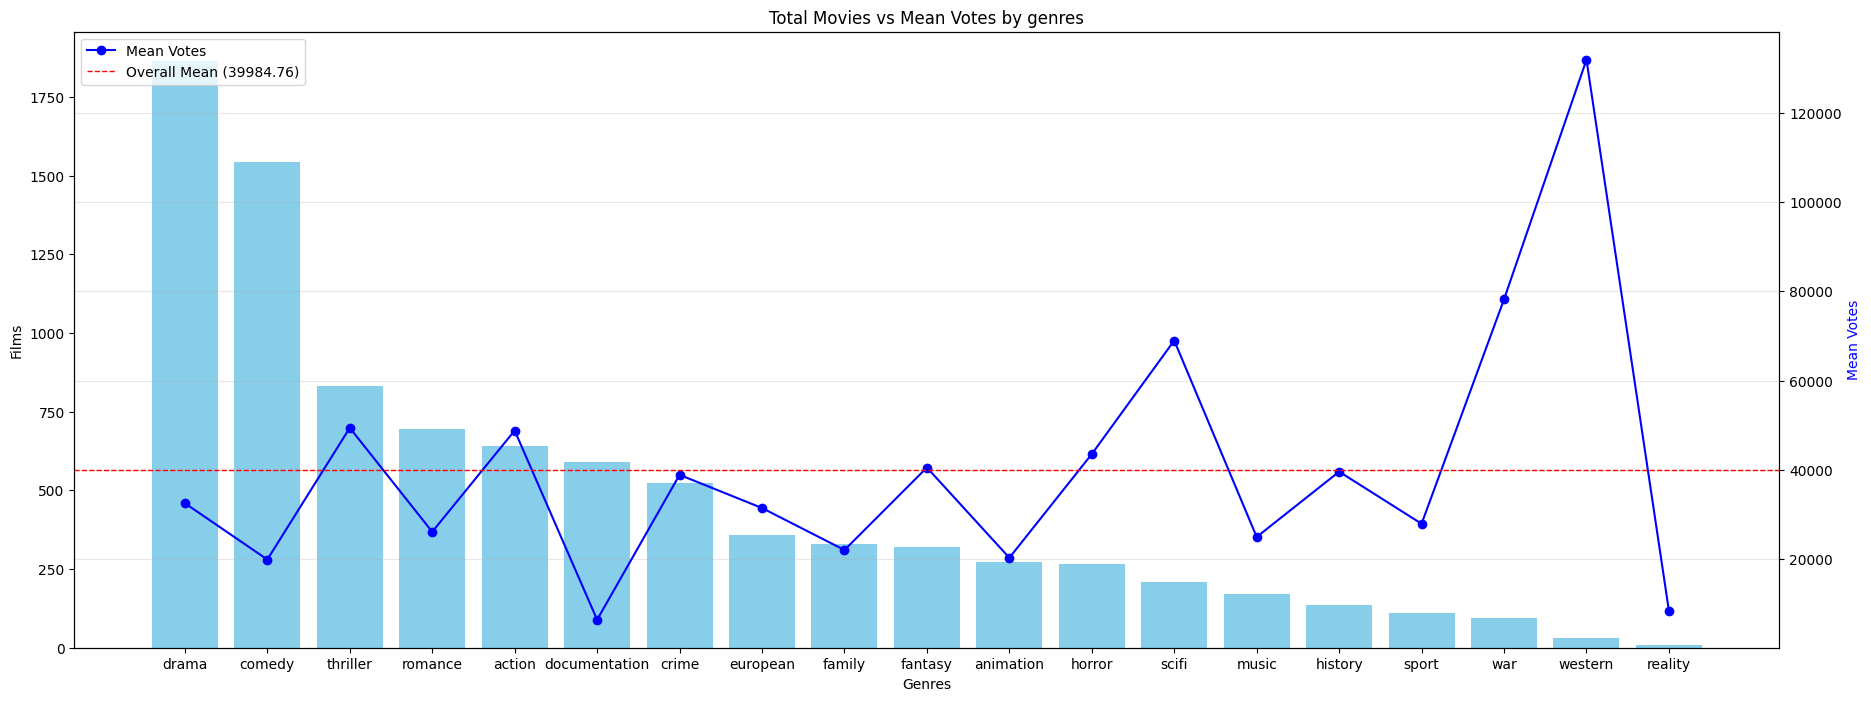

In [38]:
fig,ax1=plt.subplots(figsize=(22,8))
sorted_df = movies_genre.sort_values(by="total_movies", ascending=False)

ax1.bar(sorted_df["genres"],sorted_df["total_movies"],color="skyblue",label="Median Votes")

ax1.set_xlabel("Genres")
ax1.set_ylabel("Films")

ax2 = ax1.twinx()
ax2.plot(sorted_df["genres"],sorted_df["mean_votes"],color="Blue",marker="o",label="Mean Votes")
ax2.set_ylabel("Mean Votes",color="Blue")
overall_mean = sorted_df["mean_votes"].mean()
ax2.axhline(overall_mean, color="red", linestyle="--", linewidth=1, label=f"Overall Mean ({overall_mean:.2f})")
plt.title("Total Movies vs Mean Votes by genres")
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

WESTERN BEING THE MOST RATED GENRE AND DOCUMENTATION, REALITY ARE LEAST RATED GENRES. DRAMA AND COMEDY ARE AMONG MOST PRODUCED GENRES AND REALITY BEING THE LIST. THE RED LINE INDICATES THE MEAN VOTES.

### FILMS RELEASED IN 2003

In [39]:
df_movies[df_movies["release_year"]==2003]

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
587,281,tm139658,Big Fish,MOVIE,2003,PG-13,125,drama,['US'],tt0319061,8.0,435503.0
588,281,tm139658,Big Fish,MOVIE,2003,PG-13,125,fantasy,['US'],tt0319061,8.0,435503.0
589,281,tm139658,Big Fish,MOVIE,2003,PG-13,125,romance,['US'],tt0319061,8.0,435503.0
600,286,tm133767,Love Actually,MOVIE,2003,R,139,drama,"['GB', 'US']",tt0314331,7.6,474176.0
601,286,tm133767,Love Actually,MOVIE,2003,R,139,comedy,"['GB', 'US']",tt0314331,7.6,474176.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,634,tm254052,Kucch To Hai,MOVIE,2003,NaN,142,romance,['IN'],tt0348662,4.3,909.0
1460,660,tm87672,Rabun,MOVIE,2003,NaN,90,drama,['MY'],tt0368190,7.7,83.0
1461,660,tm87672,Rabun,MOVIE,2003,NaN,90,family,['MY'],tt0368190,7.7,83.0
1495,678,tm341561,Like Twenty Impossibles,MOVIE,2003,NaN,16,NaN,['PS'],NaN,NaN,NaN


### GENRE WISE NUMBER OF FILMS PRODUCED BASED ON AGE-CERTIFICATION 

In [40]:
genre_age_cert = df_movies.groupby(["genres","age_certification"])["genres"].count().unstack(fill_value=0)


<Axes: xlabel='age_certification', ylabel='genres'>

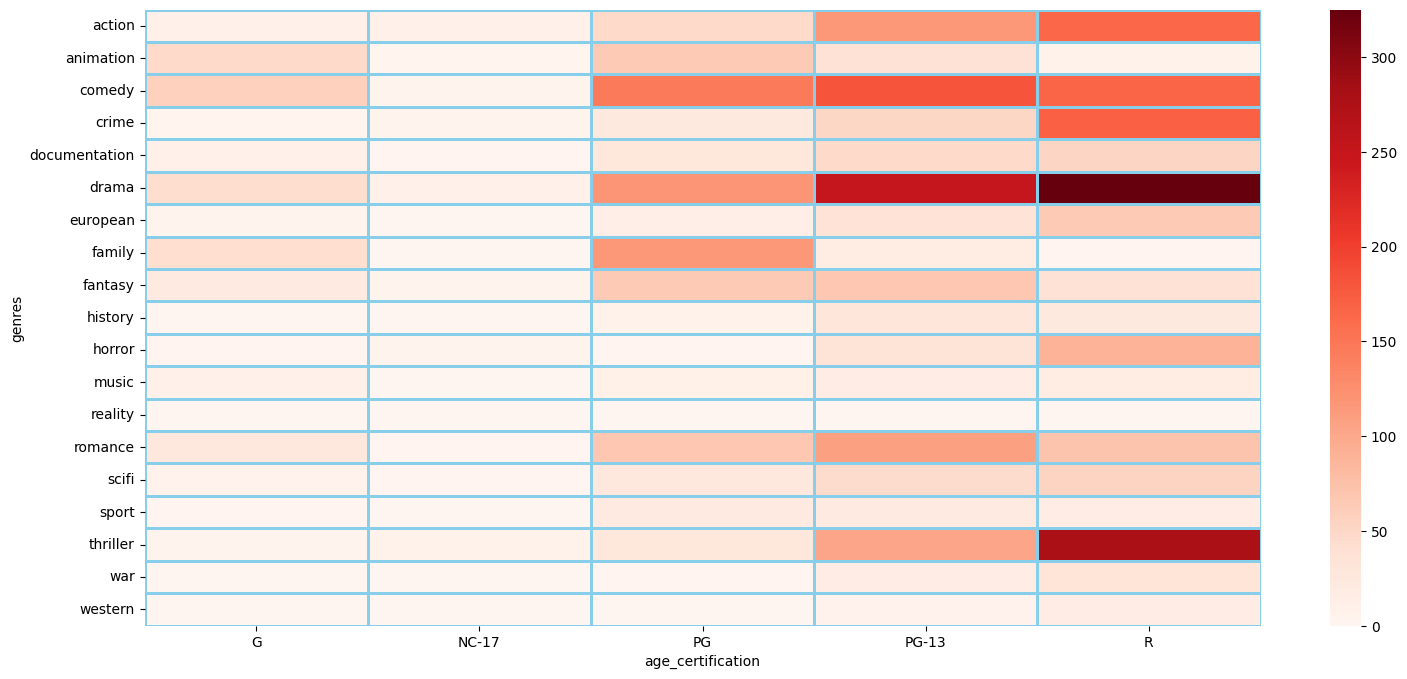

In [41]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.heatmap(genre_age_cert,cmap="Reds",linecolor="skyblue",linewidths=1)

ADULT RATED FILMS ARE MORE LIKELY PRODUCED IN ALMOST ALL GENRES EXCEPT GENRES LIKE ANIMATION,FAMILY,FANTACY,ROMANCE. NC-17 CONTENTS ARE LEAST PRODUCED IN ALMOST ALL GENRES.

#### BREAKDOWN OF NUMBER OF FILMS BY AGE-CERTTIFICATION

In [42]:
df_movies.groupby(["age_certification"])["genres"].count()

age_certification
G         292
NC-17      55
PG        795
PG-13    1192
R        1595
Name: genres, dtype: int64

#### A VISUAL REPRESENTATION OF HOW NUMBER OF FILMS IN EACH GENRE HAVE INCREASED OVER THE YEARS

In [43]:
df_movies_genre= df_movies[df_movies["release_year"]>2012].groupby(["genres","release_year"])["genres"].count().unstack(fill_value=0)

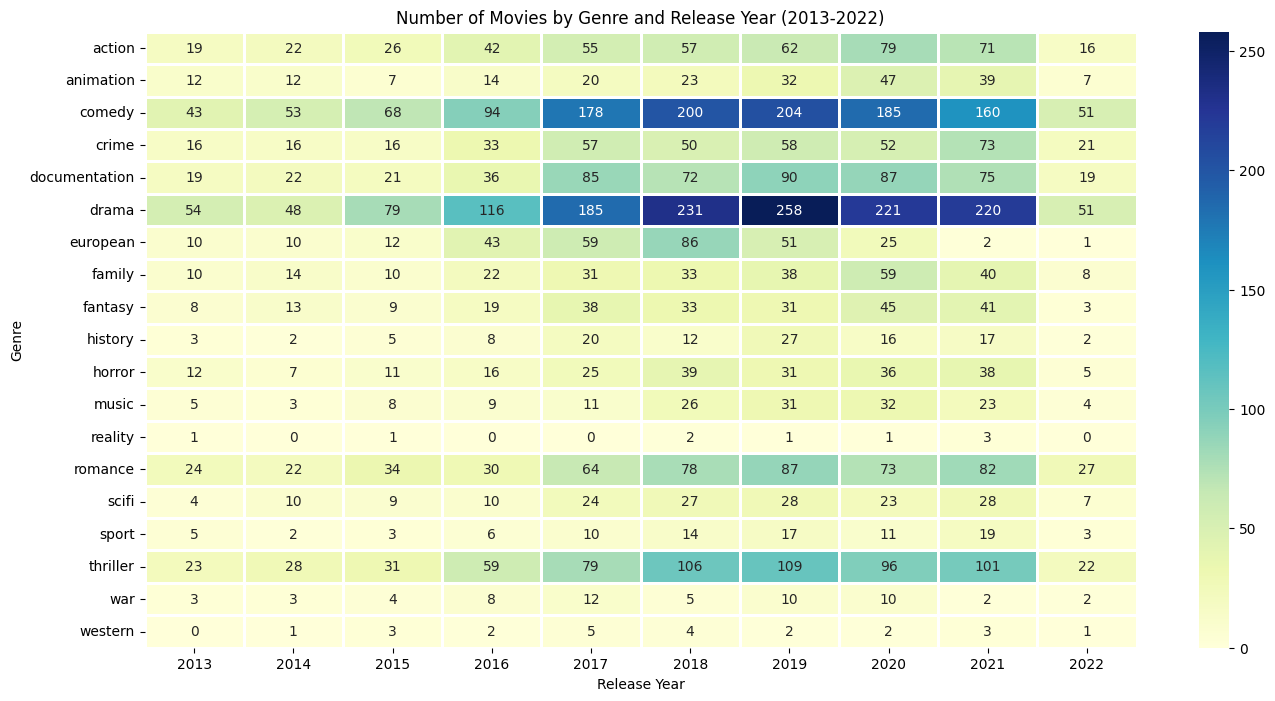

In [44]:
plt.figure(figsize=(16,8))
sns.heatmap(df_movies_genre, annot=True, fmt="d", cmap="YlGnBu", linecolor="white",linewidths=1)
plt.title("Number of Movies by Genre and Release Year (2013-2022)")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()

#### EXPLODING SHOWS DATAFRAME BY GENRES

In [45]:
import ast
df_shows["genres"]=df_shows["genres"].apply(ast.literal_eval)
df_shows=df_shows.explode("genres").reset_index(drop=True)
df_shows

C:\Users\ncras\AppData\Local\Temp\ipykernel_21536\1072760219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shows["genres"]=df_shows["genres"].apply(ast.literal_eval)


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,['US'],1.0,NaN,NaN,NaN
1,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,comedy,['GB'],4.0,tt0063929,8.8,72895.0
2,5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,european,['GB'],4.0,tt0063929,8.8,72895.0
3,29,ts45948,Monty Python's Fliegender Zirkus,SHOW,1972,TV-MA,43,comedy,[],1.0,tt0202477,8.1,2144.0
4,47,ts20681,Seinfeld,SHOW,1989,TV-PG,24,comedy,['US'],9.0,tt0098904,8.9,302700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,5796,ts286386,The Big Day,SHOW,2021,TV-MA,45,romance,['US'],2.0,tt13887518,4.6,327.0
5591,5799,ts307884,HQ Barbers,SHOW,2021,TV-14,24,comedy,['NG'],1.0,NaN,NaN,NaN
5592,5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,family,[],1.0,tt13711094,8.8,16.0
5593,5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,comedy,[],1.0,tt13711094,8.8,16.0


#### LETS GROUP THE DATA FOR THE SHOWS

In [80]:
shows_genre = df_shows.groupby(["genres"]).agg(mean_rating=("imdb_score","mean"),mean_votes=("imdb_votes","mean"),avg_runtime=("runtime","mean"),total_shows=("title","count")).round(1).reset_index()
shows_genre

,genres,mean_rating,mean_votes,avg_runtime,total_shows
0,action,7.0,24662.7,35.1,412
1,animation,6.9,9380.3,20.6,394
2,comedy,7.0,13453.1,31.5,726
3,crime,7.3,31155.4,47.5,367
4,documentation,7.2,5096.8,44.5,320
5,drama,7.2,28113.1,44.0,1037
6,european,7.3,28690.4,37.8,103
7,family,6.7,5503.3,23.5,293
8,fantasy,7.1,25080.0,32.3,310
9,history,7.5,13533.6,50.3,96


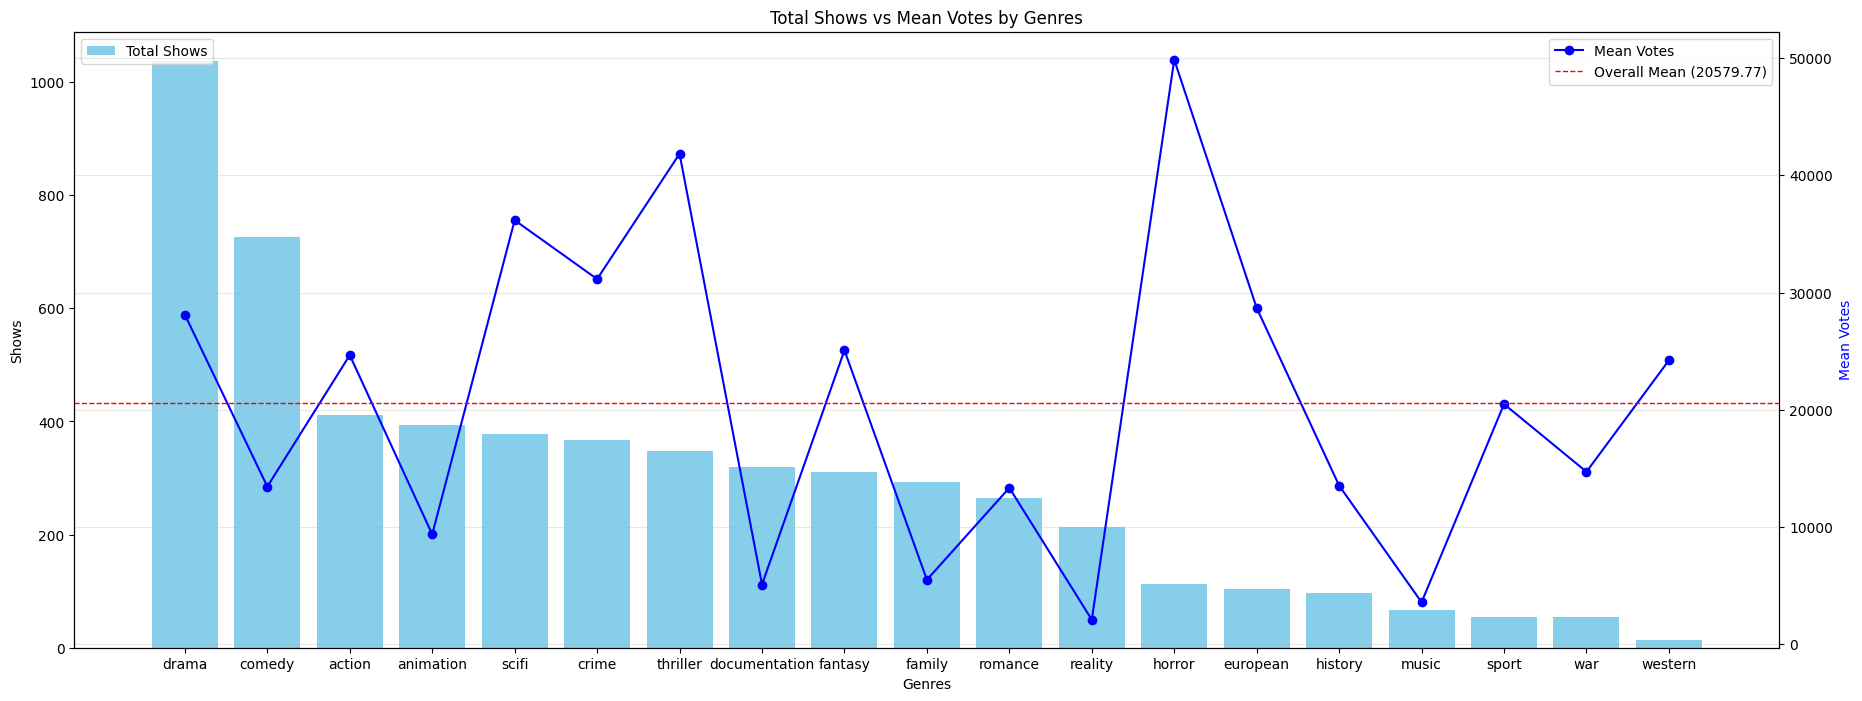

In [81]:
fig, ax1 = plt.subplots(figsize=(22,8))
sorted_df = shows_genre.sort_values(by="total_shows", ascending=False)

# Bar plot (total shows per genre)
ax1.bar(sorted_df["genres"], sorted_df["total_shows"], color="skyblue", label="Total Shows")
ax1.set_xlabel("Genres")
ax1.set_ylabel("Shows")

# Line plot (mean votes per genre)
ax2 = ax1.twinx()
ax2.plot(sorted_df["genres"], sorted_df["mean_votes"], color="blue", marker="o", label="Mean Votes")
ax2.set_ylabel("Mean Votes", color="blue")

# Calculate and plot overall mean line
overall_mean = sorted_df["mean_votes"].mean()
ax2.axhline(overall_mean, color="red", linestyle="--", linewidth=1, label=f"Overall Mean ({overall_mean:.2f})")

# Add title, legend, grid
plt.title("Total Shows vs Mean Votes by Genres")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(True, alpha=0.3)
plt.show()


HORROR BEING THE MOST RATED GENRE AND DOCUMENTATION, REALITY ARE LEAST RATED GENRES. DRAMA AND COMEDY ARE AMONG MOST PRODUCED GENRES AND WESTERN BEING THE LEAST. THE RED LINE INDICATES THE MEAN VOTES.

In [48]:
genre_shows_cert = df_shows.groupby(["genres","age_certification"])["genres"].count().unstack(fill_value=0)[["TV-Y","TV-Y7","TV-G","TV-PG","TV-14","TV-MA"]]

#### LETS SEE HOW EACH GENRE OF SHOWS HAVE BEEN PRODUCED BY AGE-CERTIFICATION

<Axes: xlabel='age_certification', ylabel='genres'>

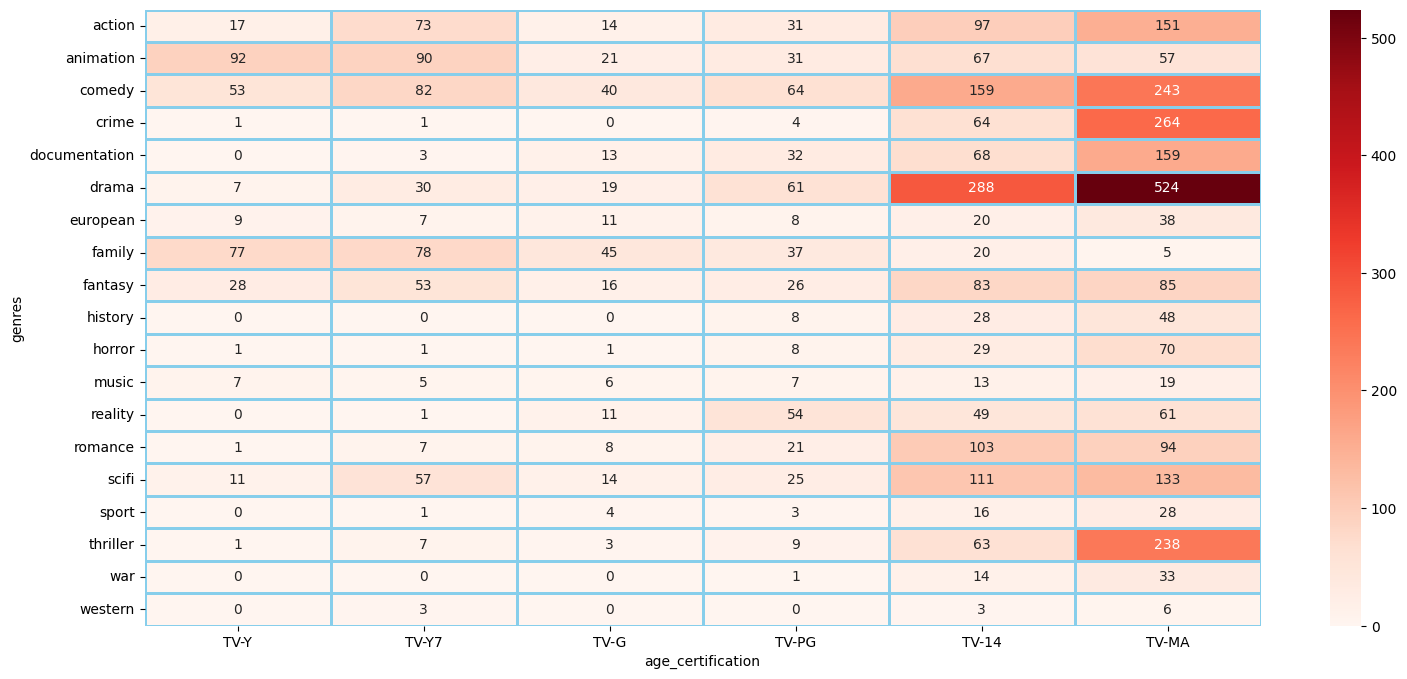

In [49]:
plt.figure(figsize=(18,8))
sns.heatmap(genre_shows_cert,annot= True,fmt="d",cmap="Reds",linecolor="skyblue",linewidths=1)

MOST SHOWS ARE PRODUCED FOR ADULTS. SHOCKINGLY CHILDREN SECTION SHOWS ARE MORE THAN AS FOR ADLOSCENTS

#### LETS SEE HOW NUMBER OF SHOWS IN EACH GENRE HAVE INCREASED OVER THE YEARS

In [50]:
df_shows_genre= df_shows[df_shows["release_year"]>2012].groupby(["genres","release_year"])["genres"].count().unstack(fill_value=0)

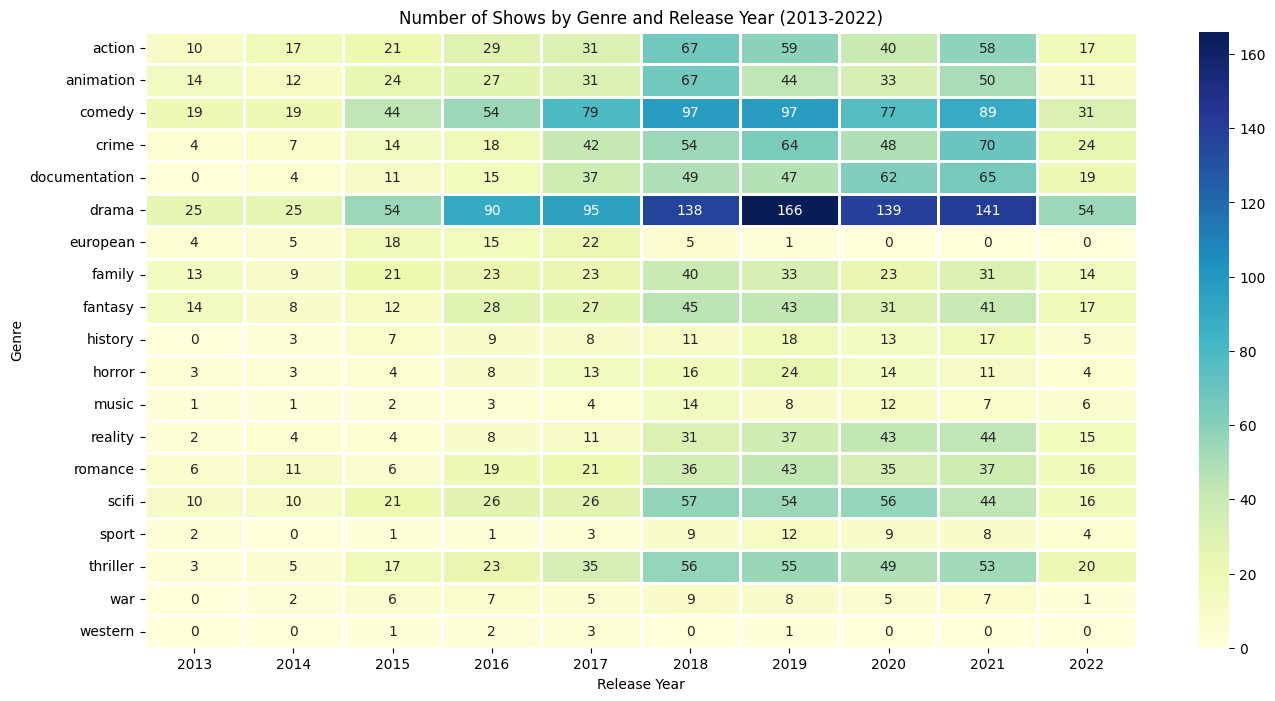

In [51]:
plt.figure(figsize=(16,8))
sns.heatmap(df_shows_genre, annot=True, fmt="d", cmap="YlGnBu", linecolor="white",linewidths=1)
plt.title("Number of Shows by Genre and Release Year (2013-2022)")
plt.xlabel("Release Year")
plt.ylabel("Genre")
plt.show()

2019 WAS THE TIME WHEN THE MOST SHOWS WERE RELEASED IN NETFLIX, THE DRAMA GENRE WERE THE MOST POPULAR DURING THIS TIME

#### EXPLODING MOVIES COUNTRY WISE TO GET SOME INSIGHT

In [52]:
import ast

def safe_eval(x):
    if isinstance(x, str):
        return ast.literal_eval(x)  # convert string → list
    return x  # already list, keep it

df_movies["production_countries"] = df_movies["production_countries"].apply(safe_eval)

df_exploded_movies = df_movies.explode("production_countries").reset_index(drop=True)

In [53]:
df_shows["production_countries"] = df_shows["production_countries"].apply(safe_eval)

df_exploded_shows = df_shows.explode("production_countries").reset_index(drop=True)

In [54]:
df_exploded_shows[df_exploded_shows["production_countries"].isnull()].nunique()

index                   80
id                      80
title                   80
type                     1
release_year            12
age_certification        6
runtime                 43
genres                  15
production_countries     0
seasons                  5
imdb_id                 72
imdb_score              37
imdb_votes              61
dtype: int64

In [55]:
df_exploded_movies[df_exploded_movies["production_countries"].isnull()].nunique()

index                   151
id                      151
title                   151
type                      1
release_year             15
age_certification         4
runtime                  82
genres                   15
production_countries      0
imdb_id                 116
imdb_score               43
imdb_votes               90
dtype: int64

In [56]:
df_exploded_movies.sample(5)

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes
5415,2346,tm327540,Gnome Alone,MOVIE,2017,PG,85,family,US,tt5851786,5.6,3410.0
988,335,tm148379,The Cat in the Hat,MOVIE,2003,PG,81,comedy,US,tt0312528,4.0,81971.0
3477,1374,tm139194,Ratchet & Clank,MOVIE,2016,PG,94,scifi,US,tt2870834,5.5,10764.0
6862,3053,tm404569,Shubh Aarambh,MOVIE,2017,NaN,126,drama,IN,tt6949882,6.8,121.0
4322,1827,tm239091,Blade Runner 2049,MOVIE,2017,R,164,thriller,HU,tt1856101,8.0,539864.0


TOP 10 COUNTRIES THAT HAVE HIGH MEAN RATINGS FOR THEIR MOVIES

#### AN INSIGHT BASED ON THE PRODUCTION COUNTRIES

In [57]:
msummary = (
    df_exploded_movies
    .groupby(["production_countries", "title"])
    .agg(
        count_titles=("title", "count"),
        mean_score=("imdb_score", "mean"),
        mean_votes=("imdb_votes", "mean")
    )
    .reset_index()
)


In [58]:
summary_movies=msummary.groupby("production_countries").agg(mean_score=("mean_score","mean"),median_votes=("mean_votes","median"),total_titles=("title","nunique")).round(1).sort_values("total_titles",ascending=False).reset_index().head(25)
summary_movies

,production_countries,mean_score,median_votes,total_titles
0,US,6.3,7496.0,1528
1,IN,6.4,3498.5,583
2,GB,6.6,12372.0,260
3,FR,6.3,2839.5,185
4,CA,6.1,5435.0,153
5,ES,6.2,3281.0,141
6,JP,6.7,2622.0,121
7,DE,6.2,4160.0,107
8,MX,6.1,362.0,81
9,PH,6.3,302.0,81


US IS AMONG THE TOP COUNTRIES WHICH INVOLVED IN THE PRODUCTION OF THE FILMS WITH 3X MORE THAN THE SECOND BEST. INDIA IS ON THE SECOND POSITION. 
THE MEAN IMDB VOTES FOR GREAT BRITAN STANDS TOP AMONG ALL THE FILMS WHICH INDICATES THE MOST PERCENTAGE OF FILMS MADE IN GB ARE POPULAR

In [59]:
ssummary = (
    df_exploded_shows
    .groupby(["production_countries", "title"])
    .agg(
        count_titles=("title", "count"),
        mean_score=("imdb_score", "mean"),
        mean_votes=("imdb_votes", "mean")
    )
    .reset_index()
)

In [60]:
summary_shows=ssummary.groupby("production_countries").agg(mean_score=("mean_score","mean"),median_votes=("mean_votes","median"),total_titles=("title","nunique")).round(1).sort_values("total_titles",ascending=False).reset_index().head(25)
summary_shows

,production_countries,mean_score,median_votes,total_titles
0,US,7.0,3045.0,794
1,JP,7.2,1623.5,169
2,KR,7.5,1537.0,166
3,GB,7.2,4136.0,144
4,ES,6.7,1454.0,71
5,CA,6.9,2977.0,63
6,FR,6.9,1469.0,63
7,CN,7.5,366.0,47
8,IN,6.8,3049.0,44
9,AU,7.1,1482.0,42


US IS AMONG THE TOP CONTRIBUTOR TO NETFLIX FOR SHOWS AS WELL. THE SECOND BEST COUNTRY IS NEARLY 5X LESSER THAN US.IN COMPARING TO ITS NUMBER OF SHOWS EVEN THE MEDIAN VOTES COMPARING TO ITS NUMBER OF SHOWS ARE HIGHER. THE SHOWS WHICH ARE PRODUCED BY KOREA HAVE GOT MEAN 7.5 RATINGS WHICH IS HIGHEST AMONG ALL COUNTRIES

#### PERCENTAGE OF FILMS PRODUCED FROM EACH COUNTRY BASED ON THE AGE-CERTIFICATION

In [61]:
a = pd.pivot_table(
    df_exploded_movies,
    values="imdb_score",
    index="production_countries",
    columns="age_certification",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total"
)


In [62]:
a=a.drop(index="Total")

a= a[a["Total"]>30][["NC-17","G","PG","PG-13","R","Total"]].sort_values("Total",ascending=False)

In [84]:
a_pct = a.div(a["Total"], axis=0).multiply(100).round(1)
a_pct.drop(columns=["Total"],axis=1)


age_certification,NC-17,G,PG,PG-13,R
production_countries,,,,,
US,0.7,3.6,18.3,25.9,51.4
IN,1.5,18.2,31.4,35.9,13.0
GB,0.0,3.0,9.9,32.7,54.4
JP,7.5,3.9,23.9,50.6,14.1
CA,0.0,8.1,27.6,24.0,40.3
FR,1.2,4.7,12.8,26.7,54.7
DE,4.0,1.6,4.0,31.7,58.7
ES,0.0,5.7,19.7,23.8,50.8
CN,0.0,0.9,35.5,34.6,29.0


AMONG TOP PRODUCING COUNTRIES INDIA AND JAPAN LESS LIKELY TO PRODUCE AN R RATED FILMS THAN ANY OTHER COUNTRY. 
IN 7 COUNTRIES MORE THAN 50% R RATED MOVIES ARE MORE PRODUCED. IN INDIA AND JAPAN WE CAN SEE DIVRSED AGE-CERTIFICATIONS FILMS THAN ANY OTHER COUNTRIES

#### PERCENTAGE OF SHOWS PRODUCED FROM EACH COUNTRY BASED ON THE AGE-CERTIFICATION

In [63]:
b = pd.pivot_table(
    df_exploded_shows,
    values="imdb_score",
    index="production_countries",
    columns="age_certification",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total"
)


In [64]:

b= b[b["Total"]>30][["TV-Y","TV-Y7","TV-G","TV-PG","TV-14","TV-MA","Total"]].sort_values("Total",ascending=False)
b_pct = b.div(b["Total"], axis=0).multiply(100).round(1)


In [65]:
b_pct=b_pct.drop(columns=["Total"],axis=1)
b_pct=b_pct.drop(index="Total")
b_pct

age_certification,TV-Y,TV-Y7,TV-G,TV-PG,TV-14,TV-MA
production_countries,,,,,,
US,7.0,16.4,6.3,10.2,23.4,36.7
JP,1.1,9.6,1.0,8.9,45.7,33.8
GB,10.0,5.1,7.0,17.6,17.3,42.8
KR,3.3,2.1,1.8,5.7,41.4,45.8
CA,17.4,23.9,6.5,21.9,10.0,20.4
ES,5.4,6.5,3.2,0.0,11.8,73.1
FR,11.2,15.3,9.4,1.2,5.3,57.6
CN,5.4,3.6,0.0,21.4,66.1,3.6
MX,0.0,11.2,0.0,1.0,13.3,74.5


INDIA IS MORE LIKELY TO PRODUCE AN ADULT CONTENT SHOWS THAN ANY OTHER COUNTRY WITH A 87%.10 COUNTRIES HAVE MORE THAN 50% OF SHOWS AS R RATED. CANADA HAS THE MOST DISTRIBUTED NUMBER OF SHOWS FROM EACH AGE CERTIFICATION

#### SHOWS WHICHA ARE PRODUCED BY US,HAS MORE THAN 2 SEASONS,HAS IMDB SCORE GREATER THAN OR EQUAL TO 7 AND HAS MORE THAN 50000 IMDB VOTES

In [66]:
us_shows = df_exploded_shows[(df_exploded_shows["seasons"]>2)&(df_exploded_shows["production_countries"]=="US")&(df_exploded_shows["imdb_score"]>=7)&(df_exploded_shows["imdb_votes"]>50000)]
us_shows["title"].nunique()

63

THERE ARE 63 SUCH SHOWS PRODUCED BY US

In [67]:
df_exploded_movies.groupby(["production_countries","release_year"])["title"].nunique().unstack(fill_value=0).sort_values(2019,ascending=False).loc[:,2008:2021].head(10)

release_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
production_countries,,,,,,,,,,,,,,
US,18,19,23,36,33,45,47,68,101,185,174,208,196,154
IN,17,17,18,21,25,26,27,24,22,44,49,81,49,47
FR,2,2,1,1,1,0,3,9,13,19,35,34,22,19
GB,5,4,2,4,5,5,10,11,16,30,32,31,31,39
ES,1,0,1,1,0,3,1,0,12,23,33,28,17,12
CA,1,3,2,3,2,2,8,6,11,25,17,21,19,18
JP,3,2,3,1,5,2,3,0,7,9,14,18,16,14
CN,2,0,1,2,0,1,2,1,6,7,7,13,6,9
NG,0,1,1,1,2,3,3,4,7,4,10,13,12,7


THE ABOVE TABLE SHOWS NUMBER OF SHOWS ADDED BY EACH COUNTRY YEAR WISE

#### GENRES OF MOVIES FROM EACH YEAR WHICH HAS BEEN MOST POPULAR IN IMDB AS PER THE VOTES

In [68]:
df_country = df_exploded_movies.sort_values("production_countries").drop_duplicates("title",keep="first")
countries = df_country.groupby("production_countries")["title"].count()

eligible_countries = countries[countries > 5].index

filtered_df = df_country[df_country["production_countries"].isin(eligible_countries)]

highest_rated_per_country = filtered_df.loc[
    filtered_df.groupby("production_countries")["imdb_votes"].idxmax()].sort_values("imdb_votes", ascending=False)
highest_rated_per_country.reset_index(inplace=True)

highest_rated_per_country.groupby("genres")["id"].count().reset_index(name="count").sort_values("count",ascending=False)


,genres,count
5,drama,9
2,comedy,7
13,thriller,5
6,european,4
0,action,4
11,romance,3
3,crime,2
14,war,2
1,animation,1
4,documentation,1


DRAMA COMEDY THRILLER ARE THE TOP 3 GENRES FROM EACH YEARS HIGHEST VOTED MOVIES. WE CONSIDERED THE YEAR WHERE MORE THAN 5 FILMS WERE RELEASED

#### LIST OF BEST FILMS FROM EACH YEAR BASED ON THEIR IMDB SCORES

In [69]:
df_sorted = df_exploded_movies.sort_values(
    by=["release_year", "imdb_score", "imdb_votes"],
    ascending=[True, False, False]
)

df_best_movies = df_sorted.groupby("release_year").head(1).reset_index(drop=True)



#### LIST OF BEST SHOWS FROM EACH YEAR BASED ON THEIR IMDB SCORES

In [70]:
df_sorted = df_exploded_shows.sort_values(
    by=["release_year", "imdb_score", "imdb_votes"],
    ascending=[True, False, False]
)

df_best_shows = df_sorted.groupby("release_year").head(1).reset_index(drop=True)


#### DROPPING THE TITLES WHERE ONLY ONE MOVIE IS RELEASED AND THEIR IMDB RATING AND IMDB VOTES ARE NAN
#### WRITING THIS DATA TO A CSV FILE

In [71]:
df_best_shows.dropna(subset=["imdb_score","imdb_votes"],inplace =True)
df_best_movies.dropna(subset=["imdb_score","imdb_votes"],inplace =True)

In [72]:
df_best_shows.to_csv(r"C:\Users\ncras\Downloads\Netflix Data\Best Shows by each year.csv")

In [73]:
df_best_movies.to_csv(r"C:\Users\ncras\Downloads\Netflix Data\Best Movies by each year.csv")

#### A DATA SET WHERE EACH MOVIES ACTORS AND DIRECTORS ARE MENTIONED

In [74]:
df_credits=pd.read_csv(r"C:\Users\ncras\Downloads\Netflix Data\raw_credits.csv")
df_credits

,index,person_id,id,name,character,role
0,0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...,...
77208,77208,1347054,tm1098060,Nnenna Rachael Okonkwo,Afinni,ACTOR
77209,77209,157590,tm1098060,Lucien Morgan,Dr. Ian Stones,ACTOR
77210,77210,129059,tm1098060,Magdalena Korpas,Jane,ACTOR
77211,77211,2050199,tm1098060,Mistura Olusanya,Nurse Titi,ACTOR


In [75]:
#MERGING TWO DATA SETS 
df_role_movies=pd.merge(df_exploded_movies,df_credits,on="id",how="inner")
df_role_shows=pd.merge(df_exploded_shows,df_credits,on="id",how="inner")

#### TOP 10 DIRECTORS WHO HAS MOST NUMBER OF MOVIES IN NETFLIX 

In [76]:
(
    df_role_movies[df_role_movies["role"]=="DIRECTOR"]
    .drop_duplicates(subset=["name", "title"])   # ensure unique title per director
    .groupby("name")
    .agg(
        titles=("title", "count"),            # number of unique titles
        mean_rate=("imdb_score", "mean"),       # mean score across unique titles
        mean_votes=("imdb_votes", "mean")       # mean votes across unique titles
    )
    .round(1)
    .sort_values("titles", ascending=False)
    .head(10)
)


,titles,mean_rate,mean_votes
name,,,
Raúl Campos,21,6.2,194.5
Jan Suter,20,6.1,198.4
Marcus Raboy,15,6.5,1481.5
Jay Karas,15,6.9,3626.8
Jay Chapman,12,6.7,893.6
Cathy Garcia-Molina,12,7.0,678.2
Ryan Polito,11,6.9,2522.6
Youssef Chahine,11,7.0,1607.9
Justin G. Dyck,9,5.0,2291.0


DIRECTOR RAUL CAMPOS HAS 21 MOVIES HIGHEST AMONG THE DIRECTORS. JAY KARAS IS MORE POPULAR AND HAS A  2ND HIGHEST RATING AMONG DIRECTORS. CATHY GRACIA MOINA IS THE HIGHEST RATED DIRECTOR

#### TOP 10 ACTORS WHO HAS MORE NUMBER OF MOVIES IN NETFLIX

In [77]:
(
    df_role_movies[df_role_movies["role"]=="ACTOR"]
    .drop_duplicates(subset=["name", "title"])   # ensure unique title per director
    .groupby("name")
    .agg(
        titles=("title", "nunique"),            # number of unique titles
        mean_rate=("imdb_score", "mean"),       # mean score across unique titles
        mean_votes=("imdb_votes", "mean")       # mean votes across unique titles
    )
    .round(1)
    .sort_values("titles", ascending=False)
    .head(10)
)

,titles,mean_rate,mean_votes
name,,,
Shah Rukh Khan,30,6.3,25150.3
Boman Irani,25,6.5,35598.8
Kareena Kapoor Khan,25,6.3,32464.4
Anupam Kher,24,6.0,45603.2
Paresh Rawal,22,6.4,11741.6
Nawazuddin Siddiqui,20,7.1,15297.4
Priyanka Chopra Jonas,20,6.4,20491.4
Naseeruddin Shah,19,6.7,13355.1
Amitabh Bachchan,19,6.6,23577.3


SHAH RUKH KHAN HAS THE MOST NUMBER MOVIES IN NETFLIX, NAWAZUDDIN SIDDIQUI HAS BEEN PART OF FILMS WHICH ARE HIGHLY RATED AMONG ALL 

#### TOP 10 DIRECTORS WHO HAS MORE SHOWS IN NETFLIX

In [78]:
(
    df_role_shows[df_role_shows["role"]=="DIRECTOR"]
    .drop_duplicates(subset=["name", "title"])   # ensure unique title per director
    .groupby("name")
    .agg(
        titles=("title", "count"),            # number of unique titles
        mean_rate=("imdb_score", "mean"),       # mean score across unique titles
        mean_votes=("imdb_votes", "mean")       # mean votes across unique titles
    )
    .round(1)
    .sort_values("titles", ascending=False)
    .head(10)
)

,titles,mean_rate,mean_votes
name,,,
Song Hyun-wook,6,7.4,1465.2
Hong Jong-chan,5,7.9,1619.0
Jung Jee-hyun,4,8.0,1973.7
Fu-chun Hsu,3,7.3,225.0
Kim Jin-min,3,7.8,10009.0
Kim Kyu-tae,3,7.9,1073.3
Chun Chieh Liu,3,7.1,122.3
Kim Won-seok,3,8.7,3854.7
Michihito Fujii,3,7.6,1463.0


SONG HYUN-WOOK HAS THE HIGHEST NUMBER OF SHOWS AMONG THE DIRECTORS. HAYATO DATE IS THE MOST POPULAR DIRECTOR.KIM WON-SEOK HAS THE BEST MEAN RATING.

#### TOP 10 ACTORS WHO HAS MORE SHOWS IN NETFLIX

In [92]:
(
    df_role_shows[df_role_shows["role"]=="ACTOR"]
    .drop_duplicates(subset=["name", "title"])   # ensure unique title per director
    .groupby("name")
    .agg(
        titles=("title", "count"),            # number of unique titles
        mean_rate=("imdb_score", "mean"),       # mean score across unique titles
        mean_votes=("imdb_votes", "mean")       # mean votes across unique titles
    )
    .round(1)
    .sort_values("titles", ascending=False)
    
).head(10)

,titles,mean_rate,mean_votes
name,,,
Junichi Suwabe,15,7.2,3201.3
Takahiro Sakurai,15,7.0,7493.2
Yoshimasa Hosoya,11,7.8,36509.3
Natsuki Hanae,10,7.6,47616.8
Ai Kayano,10,7.5,12286.9
Kim Mi-kyeong,10,7.8,4490.3
Ashleigh Ball,10,6.8,3623.7
Maaya Sakamoto,9,7.3,3036.1
Kenjiro Tsuda,9,6.9,18359.6


JUNICHI SUWABE AND TAKAHIRO SAKURAI HAS BEEN CASTED IN 15 SHOWS. YOSHIMASA HOSOYA HAS THE BEST MEAN RATING. AND NATUSKI HANAE SHOWS ARE MORE POPULAR